In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

import yfinance as yf
from fredapi import Fred

import sys
sys.path.append("/Users/jtchoi/Library/CloudStorage/GoogleDrive-jungtaek0227@gmail.com/My Drive/quant/Quant-Project/quant")
from backtest.metric import *

from econ_regime import *

In [3]:
regime_df = business_cycle()
regime_df

,deflation,inflation,recovery,expansion
1994-01-01,0,0,0,1
1994-02-01,0,0,0,1
1994-03-01,0,0,0,1
1994-04-01,0,0,0,1
1994-05-01,0,0,0,1
...,...,...,...,...
2022-08-01,0,1,0,0
2022-09-01,0,1,0,0
2022-10-01,0,1,0,0
2022-11-01,0,1,0,0


In [4]:
sp500 = yf.download('SPY')['Adj Close']
sp500.index = pd.to_datetime(pd.to_datetime(sp500.index).date)
sp500 = sp500.resample('M').last()
sp500 = sp500.iloc[:-2]
sp500

[*********************100%***********************]  1 of 1 completed


1993-01-31     25.218233
1993-02-28     25.487265
1993-03-31     26.058167
1993-04-30     25.391382
1993-05-31     26.076170
                 ...    
2022-08-31    391.764313
2022-09-30    355.547302
2022-10-31    384.444611
2022-11-30    405.816467
2022-12-31    382.429993
Freq: M, Name: Adj Close, Length: 360, dtype: float64

In [5]:
regime_df.index = sp500.loc['1994':].index
regime_df = pd.concat([sp500.pct_change(), regime_df], axis=1).dropna()
regime_df.columns = ['sp500_rets', 'deflation', 'inflation', 'recovery', 'expansion']
regime_df

,sp500_rets,deflation,inflation,recovery,expansion
1994-01-31,0.034876,0.0,0.0,0.0,1.0
1994-02-28,-0.029164,0.0,0.0,0.0,1.0
1994-03-31,-0.041902,0.0,0.0,0.0,1.0
1994-04-30,0.011212,0.0,0.0,0.0,1.0
1994-05-31,0.015940,0.0,0.0,0.0,1.0
...,...,...,...,...,...
2022-08-31,-0.040802,0.0,1.0,0.0,0.0
2022-09-30,-0.092446,0.0,1.0,0.0,0.0
2022-10-31,0.081276,0.0,1.0,0.0,0.0
2022-11-30,0.055592,0.0,1.0,0.0,0.0


### 자산군
    - 주식: sp500 index
    - 장기채권: TLT ETF
    - 원자재: GSG ETF(tracking S&P GSCI index)
    - 달러: UUP index
    - 부동산: VNQ ETF

In [6]:
asset_ticker = ['SPY','TLT', 'GSG', 'VNQ', 'UUP']
asset_df = asset_indicators(asset_ticker)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
asset_df.columns = asset_ticker
asset_df = asset_df.loc['2008-01-01':,:].dropna().resample('M').last()

In [8]:
asset_df

,SPY,TLT,GSG,VNQ,UUP
2008-01-31,102.328545,62.151566,52.500000,32.629055,22.365520
2008-02-29,99.684128,61.868595,58.410000,31.590994,21.897980
2008-03-31,98.792679,63.191856,57.860001,33.639771,21.373192
2008-04-30,103.501404,61.620747,62.599998,35.785728,21.573568
2008-05-31,105.065933,59.964222,67.900002,35.710247,21.668982
...,...,...,...,...,...
2022-10-31,384.444611,95.170639,21.850000,81.823532,29.767994
2022-11-30,405.816467,101.976341,21.590000,86.852455,28.360384
2022-12-31,382.429993,99.304520,21.230000,82.480003,27.809999
2023-01-31,406.480011,106.894997,21.209999,91.059998,27.510000


In [27]:
ma_regime_df = pd.merge(asset_df.pct_change(), regime_df, left_index=True, right_index=True, how='left').dropna()
ma_regime_df

multi_asset_tickers = ['SPY', 'TLT', 'GSG', 'VNQ', 'UUP']

### 회복국면

<AxesSubplot: >

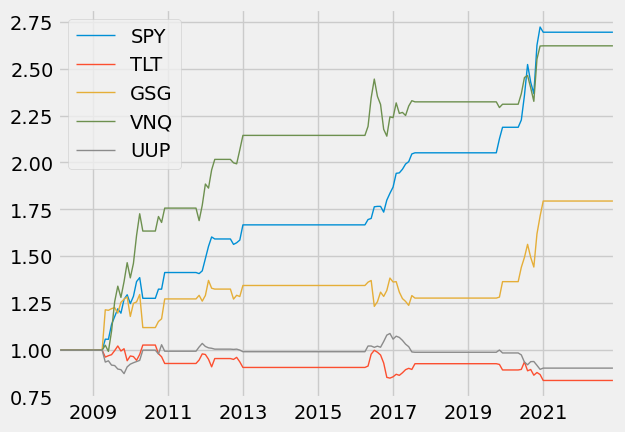

In [29]:
(1+ma_regime_df[multi_asset_tickers].mul(ma_regime_df['recovery'], axis=0)).cumprod().plot(lw=1)